<a href="https://colab.research.google.com/github/gabrielnichio/NLP/blob/main/NLP_movies_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP for reviews classification

Project developed to classify overviews of movies.

Dataset was extracted from Kaggle: https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr

Also the dataset is in portuguese, because I'm brazilian. The `sentiment` column has two values, `neg` means negative rating and `pos` means positive rating.



In [9]:
import pandas as pd
import nltk
from nltk import tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

In [10]:
data = pd.read_csv(filepath_or_buffer="/content/imdb-reviews-pt-br.csv")

data['sentiment'] = data['sentiment'].replace({'neg': 0, 'pos': 1})
print(data.shape)
data.head()

<ipython-input-10-8bd727cef693>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace({'neg': 0, 'pos': 1})


(49459, 4)


,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


# Function to classify using Linear Regression

One of the most important parts of NLP is to transform the texts into something that the computer understands. I do this here vectozing the texts and transforming them into a spase_matrix using the `CountVectorizer()` function from sklearn.

In [11]:
def text_classification(data, max_features, column):
  #Vectorizing dataset
  vectorizer = CountVectorizer(max_features=max_features)
  bag_of_words = vectorizer.fit_transform(data[column])

  y = data['sentiment']

  x_train, x_test, y_train, y_test = train_test_split(bag_of_words, y, stratify=y)

  model = LogisticRegression()
  model.fit(x_train, y_train)
  print(model.score(x_test, y_test))


text_classification(data, 100, 'text_pt')

0.707399919126567


# Visualizing the words with WordCloud

In [12]:
def generate_cloud(data, label):

  %matplotlib inline

  subset = data[data['sentiment'] == label]

  words = ' '.join([word for word in subset.text_pt])

  cloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(words)

  plt.figure(figsize=(10,7))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

## Visualization for negative reviews

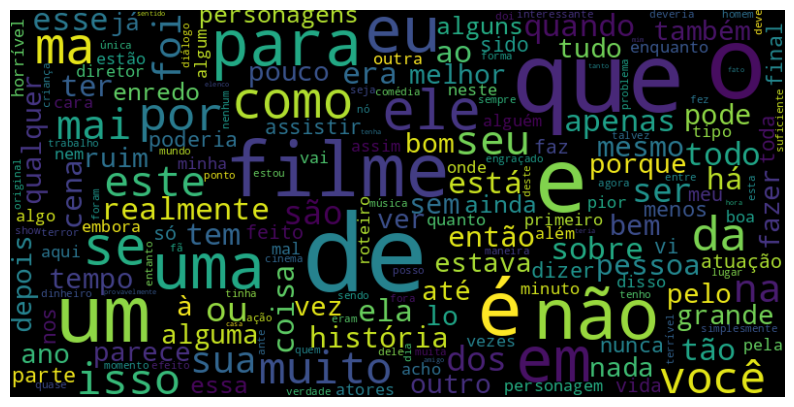

In [13]:
generate_cloud(data, 0)

## Visualization for positive reviews

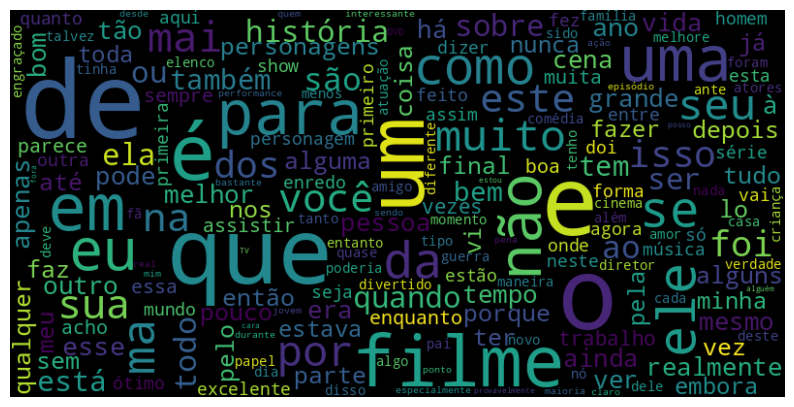

In [14]:
generate_cloud(data, 1)

# Using NLTK to tokenize

In [17]:
subset = data[data['sentiment'] == 0]
words = ' '.join([word for word in subset.text_pt])

tokenizer = tokenize.WhitespaceTokenizer()
tokenized_words = tokenizer.tokenize(words)

freq = nltk.FreqDist(tokenized_words)

In [18]:
df_freq = pd.DataFrame({'Word': freq.keys(), 'Frequency': freq.values()})
df_freq.sort_values(by='Frequency', ascending=False).head(10)

,Word,Frequency
20,de,209113
14,que,167678
42,e,137200
3,o,123049
7,um,107492
102,a,102794
45,é,93327
29,não,73713
1,uma,64633
116,para,64105


# Data treatment

There are a lot of words that are not relevant to our problem and that appear with significant frequency.

## Treating irrelevant words

NLTK has data related to words that are not relevant in NLP problems.

In [19]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [20]:
stop_words = nltk.corpus.stopwords.words('portuguese')

# removing stop words from each record
def remove_irrelevant(text, stopwords):
    tokens = tokenize.word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return " ".join(filtered_tokens)


data['clean_text'] = data['text_pt'].apply(lambda x: remove_irrelevant(x, stop_words))

In [21]:
data.head()

,id,text_en,text_pt,sentiment,clean_text
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"vez , sr. costner arrumou filme tempo necessár..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,exemplo motivo maioria filmes ação mesmos . ge...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"primeiro tudo odeio raps imbecis , poderiam ag..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,beatles puderam escrever músicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"filmes fotos latão palavra apropriada , verdad..."


In [22]:
text_classification(data, 100, 'clean_text')

0.7138697937727456
